In [1]:
# imports & config
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes

In [2]:

### load dataset
data = load_diabetes()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [5]:
### dataset overview
print("Shape: ", df.shape)
df.info()

Shape:  (442, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [6]:
### missing value check
df.isnull().sum()

,0
age,0
sex,0
bmi,0
bp,0
s1,0
s2,0
s3,0
s4,0
s5,0
s6,0


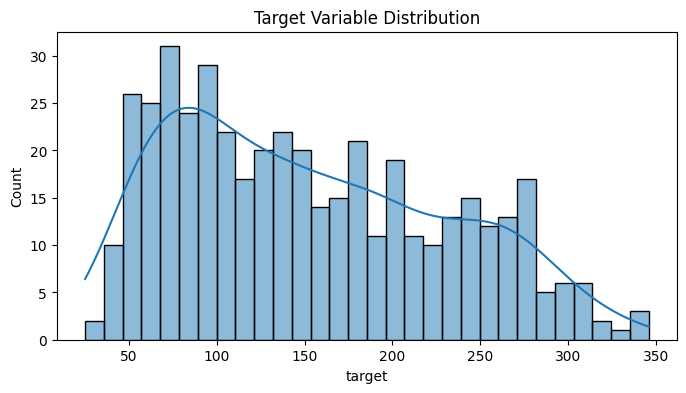

In [7]:
### target distribution
plt.figure(figsize=(8,4))
sns.histplot(df['target'], kde=True, bins=30)
plt.title("Target Variable Distribution")
plt.show()

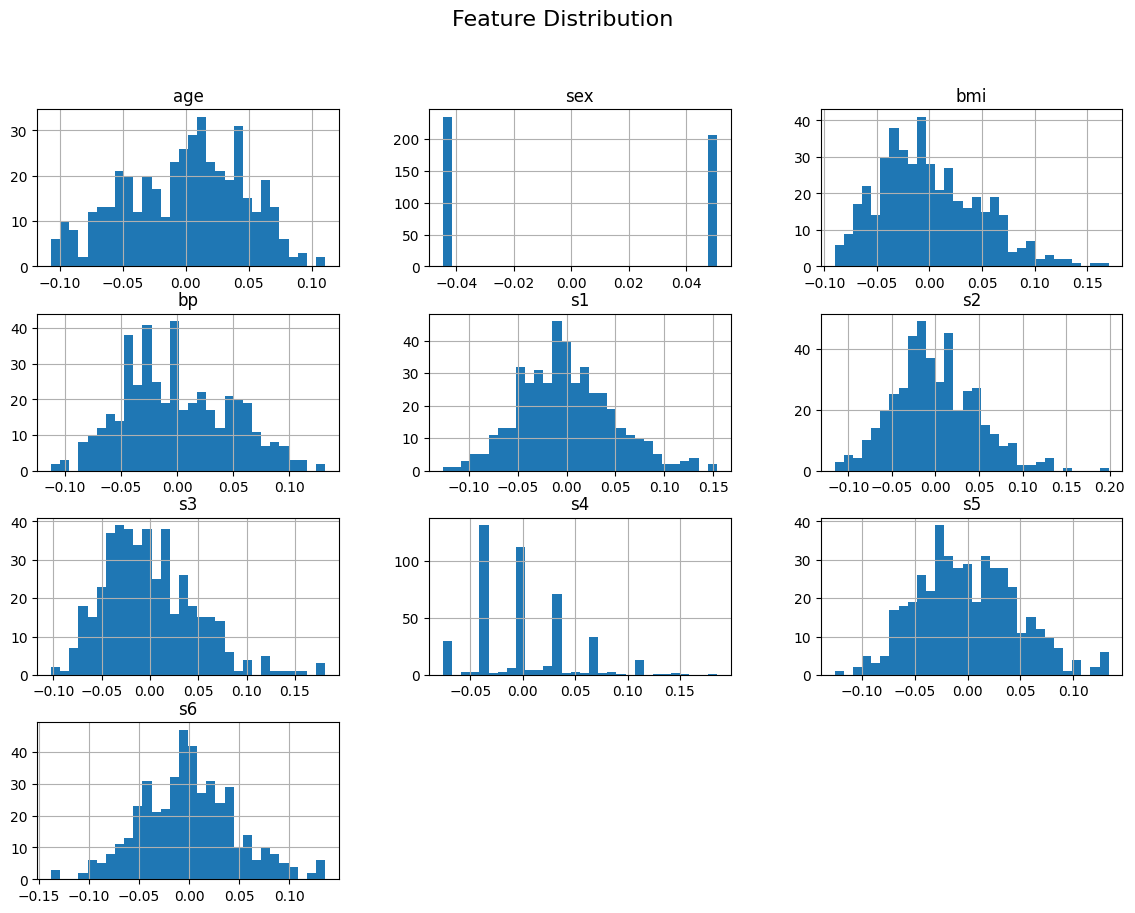

In [8]:
### Feature distributions
df.drop(columns=['target']).hist(figsize=(14,10), bins=30)
plt.suptitle("Feature Distribution", fontsize=16)
plt.show()

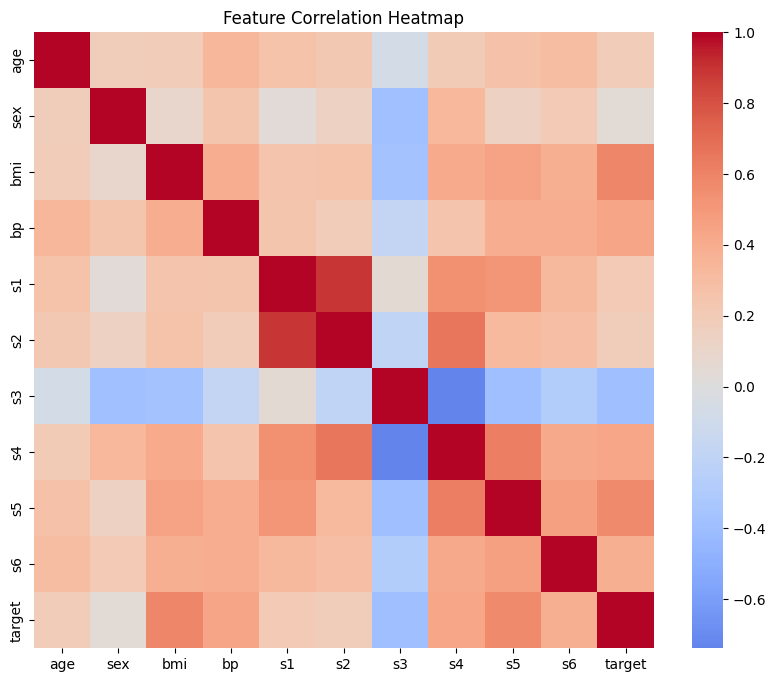

In [9]:
### correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap="coolwarm", center=0)
plt.title("Feature Correlation Heatmap")
plt.show()

### Key Observations

- All features are numeric and already standardized
- Some features show moderate correlation with the target
- No missing values, but pipeline supports missing handling
- Distribution drift can be monitored using feature means

This EDA informed:
- Choice of StandardScaler
- Drift detection strategy using mean & standard deviation
